# Análise exploratória de dados

In [14]:
# Importações de bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
import numpy as np

## 1. Descrição dos dados

O Titanic foi um luxuoso navio britânico que naufragou em sua viagem inaugural de Southampton a Nova York, em abril de 1912, após colidir com um iceberg. O desastre resultou na morte de mais de 1.500 passageiros e tripulantes, tornando-se uma das tragédias marítimas mais conhecidas da história. O dataset **titanic** permite a análise de perfis dos sobreviventes e vítimas, oferecendo insights valiosos para teorias e estudos sobre o impacto de fatores como classe social, gênero e idade na sobrevivência.

In [15]:
# Importação do dataset que será usado para o projeto
caminho_titanic = "../data/raw/titanic.csv"
titanic = pd.read_csv(caminho_titanic)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
# Importação do DataFrame
caminho = "../data/external/dictionary.csv"
dicionario = pd.read_csv(caminho)
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Binário indicando se o passageiro sobreviveu o...,qualitativa,nominal
1,pclass,Tipo de classe da passagem - representa também...,qualitativa,ordinal
2,sex,Sexo dos passageiros,qualitativa,nominal
3,age,Idade,quantitativa,discreta
4,sibsp,"Quantidade de irmãos, meio-irmãos, marido e mu...",quantitativa,discreta
5,parch,"Quantidade de filhos e enteados, pai ou mãe",quantitativa,discreta
6,fare,Valor da passagem,quantitativa,continua
7,embarked,Portão de embarque,qualitativa,nominal
8,class,Classe,qualitativa,ordinal
9,who,"Categoriza o passageiro em homem, mulher e cri...",qualitativa,nominal


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


---

O dataset "titanic" possui 891 linhas e 15 colunas. 11 dessas colunas são qualitativas e 4 são quantitativas.

Outro fato a se considerar é a idade, que está como float e, analisando melhor os valores dos dados, nota-se que realmente as idades estão expressas em números reais, algo inusual mas que não afetará a análise.

---

## 2. Perguntas de partida e hipóteses

- Existem valores nulos? Se sim, em quais colunas e como isso pode impactar na análise dos dados?

- Qual a distribuição dos dados e que insights podemos obter com isso?

- Existe alguma relação entre a taxa de sobrevivência e as demais informações?

- Logo, existe alguma relação com a quantidade de mortes e as demais informações?

- Algumas relações a serem avaliadas:

    - *Taxa de sobrevivência por sexo;*

    - *Influência da classe no resultado;*

    - *Idade e sobrevivência;*

    - *Efeito do número de parentes a bordo;*

    - *Tipo de passageiro e sobrevivência;*

    - *Diferença entre adultos e crianças;*

    - *Localização na embarcação;*

    - *Impacto de viajar sozinho;*

    - *Taxa de sobrevivência por cidade de embarque;*

    - *Comparação entre classe de cabine e sobrevivência.*


### Valores Nulos

In [23]:
valores_nulos = titanic.isna().sum()
valores_nulos

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

---

Podemos perceber que as colunas "age" possui 177 valores faltantes, ou seja, 13.13% dos dados são nulos. Caso essa falta seja relevante para o resultados das próximas análises, é possível adaptar as hipóteses contendo idade e substituí-la com uma informação que seja semelhante ou traga respostas semelhantes, como por exemplo: "who" e "adult_male".

Outra coluna que possui valores faltantes é a "deck", com mais de 75% das linhas sem valor. Com essa quantidade massiva de valores nulos, esta coluna não será considerada nas análises a seguir.

---

### Valores Únicos

In [26]:
uniques = {'Variavel': dicionario['variavel'], 'Valores': []}
for index, row in dicionario.iterrows():
    uniques['Valores'].append(titanic[row['variavel']].unique())

df_uniques = pd.DataFrame.from_dict(uniques)
display(HTML(df_uniques.to_html())) #Para impedir que os valores de idade fiquem cortados

,Variavel,Valores
0,survived,"[0, 1]"
1,pclass,"[3, 1, 2]"
2,sex,"[male, female]"
3,age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5, 74.0]"
4,sibsp,"[1, 0, 3, 4, 2, 5, 8]"
5,parch,"[0, 1, 2, 5, 3, 4, 6]"
6,fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 8.0292, 35.5, 31.3875, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708, 52.0, 7.2292, 11.2417, 9.475, 21.0, 41.5792, 15.5, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 61.9792, 27.75, 46.9, 80.0, 83.475, 27.9, 15.2458, 8.1583, 8.6625, 73.5, 14.4542, 56.4958, 7.65, 29.0, 12.475, 9.0, 9.5, 7.7875, 47.1, 15.85, 34.375, 61.175, 20.575, 34.6542, 63.3583, 23.0, 77.2875, 8.6542, 7.775, 24.15, 9.825, 14.4583, 247.5208, 7.1417, 22.3583, 6.975, 7.05, 14.5, 15.0458, 26.2833, 9.2167, 79.2, 6.75, 11.5, 36.75, 7.7958, 12.525, 66.6, 7.3125, 61.3792, 7.7333, 69.55, 16.1, 15.75, 20.525, 55.0, 25.925, ...]"
7,embarked,"[S, C, Q, nan]"
8,class,"[Third, First, Second]"
9,who,"[man, woman, child]"


Essa parte do código serve para verificar os valores que existem em cada coluna, possibilitando um melhor entendimento dos dados.

### Modelagem e Tradução dos Dados

In [33]:
titanic_modif = titanic.copy()

titanic_modif.replace({'yes': 'Sim', 'no': 'Não'}, inplace=True)
titanic_modif.replace({False: 'Não', True: 'Sim'}, inplace=True)
titanic_modif["survived"].replace({0: 'Não', 1: 'Sim'}, inplace=True)

titanic_modif.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,Não,3,male,22.0,1,0,7.2500,S,Third,man,Sim,NaN,Southampton,Não,Não
1,Sim,1,female,38.0,1,0,71.2833,C,First,woman,Não,C,Cherbourg,Sim,Não
2,Sim,3,female,26.0,0,0,7.9250,S,Third,woman,Não,NaN,Southampton,Sim,Sim
3,Sim,1,female,35.0,1,0,53.1000,S,First,woman,Não,C,Southampton,Sim,Não
4,Não,3,male,35.0,0,0,8.0500,S,Third,man,Sim,NaN,Southampton,Não,Sim


---

Algumas colunas possuem valores como True, 1 e Yes para indicar "Sim", enquanto outras utilizam False, 0 e No para indicar "Não". Para melhorar a visualização gráfica, optou-se por padronizar essas variáveis, facilitando a leitura e interpretação dos gráficos.

---

In [37]:
titanic_modif.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Distribuição dos Dados

---

<span style="font-size:18px; font-weight:bold;">Distribuição das idades</span>

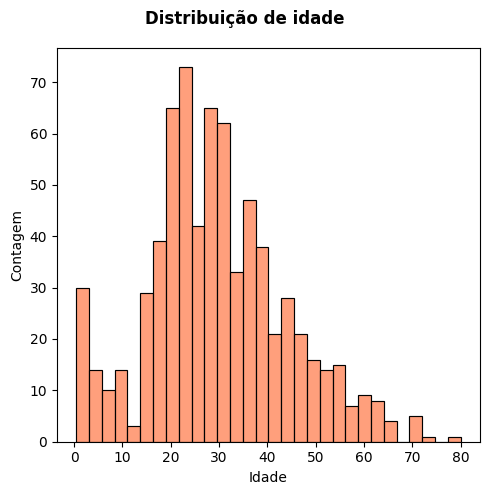

In [192]:
plt.figure(figsize=(5,5))

plt.suptitle('Distribuição de idade', fontweight='bold')

# Histograma
sns.histplot(titanic_modif['age'].dropna(), color='coral', bins=30)

# Rótulos dos eixos
plt.xlabel('Idade')
plt.ylabel('Contagem')


plt.tight_layout()
plt.show()

---

A partir da visualização, é possível afirmar que a maioria dos passageiros tem entre 20 e 40 anos.

A faixa etária varia de bebês (menos de 1 ano) até idosos (80 anos ou mais).

Há uma quantidade significativa de passageiros jovens (20-40 anos).

Existem alguns passageiros mais velhos (70-80 anos) que são considerados outliers.

A maioria dos passageiros parece estar na faixa etária de adultos jovens.

---

<span style="font-size:18px; font-weight:bold;">Distribuição das Classes</span>

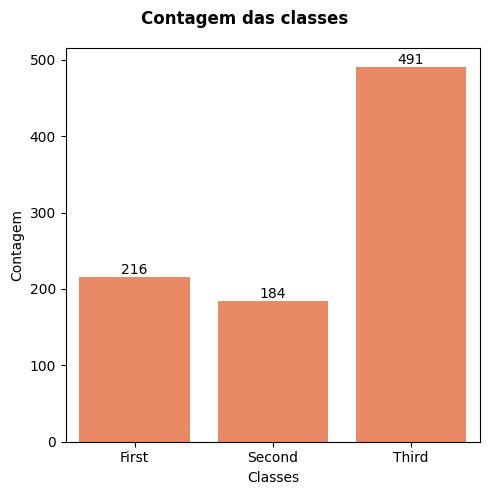

In [193]:
class_counts = titanic_modif['class'].dropna().value_counts().sort_index()

plt.figure(figsize=(5,5))

plt.suptitle('Contagem das classes', fontweight='bold')

ax = sns.barplot(x=class_counts.index, y=class_counts.values, color='coral')

plt.xlabel('Classes')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [138]:
# Contagem de classes das passagens
ticket_class = titanic_modif["pclass"].value_counts()
ticket_class

3.0    491
1.0    216
2.0    184
Name: pclass, dtype: int64

---

As colunas "class" e "pclass" são equivalentes, então o uso de ambas seria redundante. A coluna "pclass" só será usada se a análise necesitar de valores inteiros, já que o tipo dessa variável é int.

Pode-se concluir também que há mais pessoas da terceira classe, representando mais da metade da população total.

---

<span style="font-size:18px; font-weight:bold;">Distribuição de homens, mulheres e crianças</span>

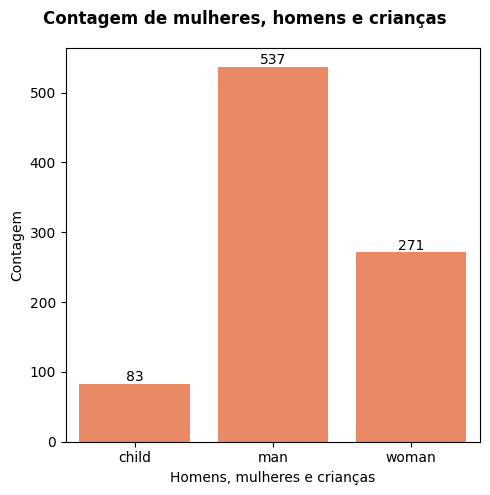

In [188]:
who_counts = titanic_modif['who'].dropna().value_counts().sort_index()

plt.figure(figsize=(5,5))

# Título
plt.suptitle('Contagem de mulheres, homens e crianças', fontweight='bold')

ax = sns.barplot(x=who_counts.index, y=who_counts.values, color='coral')
plt.xlabel('Homens, mulheres e crianças')
plt.ylabel('Contagem')

# Rótulo das colunas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')


plt.tight_layout()
plt.show()

In [143]:
# Contagem de homens adultos
adult_man = titanic_modif['adult_male'].value_counts()
adult_man

Sim    537
Não    354
Name: adult_male, dtype: int64

---

Conclui-se que a coluna "adult_male" é apenas uma extensão da coluna "who", pois o número de homens é igual ao número de homens adultos. Desse modo, a coluna "adult_male" não será usada para análises futuras.

É possível concluir também que há mais homens adultos presentes no navio, 537. A quantidade de homens representa mais de 60% dos passageiros presentes.

---

<span style="font-size:18px; font-weight:bold;">Distribuição dos Sobreviventes</span>

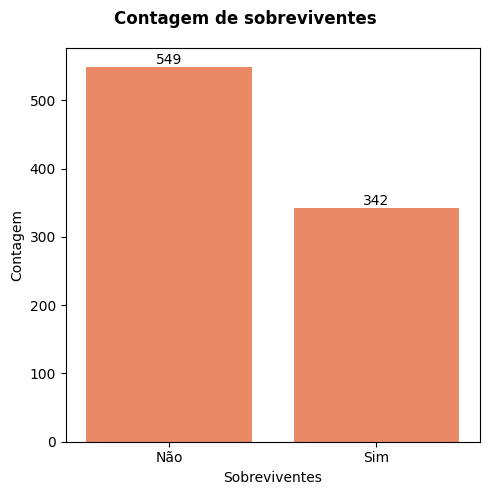

In [187]:
survived_counts = titanic_modif['survived'].dropna().value_counts().sort_index()

plt.figure(figsize=(5,5))

plt.suptitle('Contagem de sobreviventes', fontweight='bold')

ax = sns.barplot(x=survived_counts.index, y=survived_counts.values, color='coral')

plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')


plt.tight_layout()
plt.show()

---

In [88]:
# Contagem da coluna "alive"
survive = titanic_modif['alive'].value_counts()
survive

Não    549
Sim    342
Name: alive, dtype: int64

---


As colunas "alive" e "survived" são equivalente, usar as duas seria redundante, então optou-se por usar a coluna "survived". mesmo levando em consideração a possibilidade de que o número de sobreviventes possa ser diferente do número de pessoas que resultaram vivas, o valor das colunas é igual. 

---

## 3. Insights

### 3.1. Relação entre Sobrevivência e Gênero (survived vs. sex)

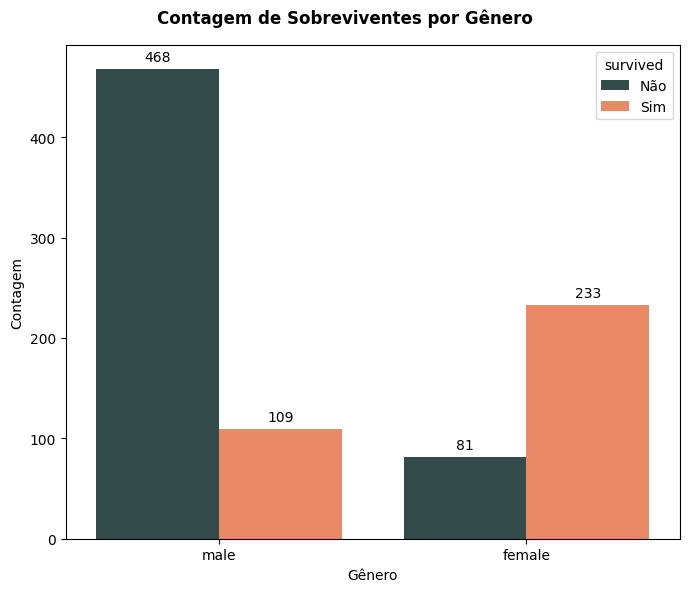

In [183]:
plt.figure(figsize=(7,6))
plt.suptitle('Contagem de Sobreviventes por Gênero', fontweight='bold')


colors = {"Não": 'darkslategray', "Sim": 'coral'}

ax = sns.countplot(x='sex', hue='survived', data=titanic_modif, palette=colors)

# Legendas
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Rótulos das barras
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5, f'{int(p.get_height())}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Homens:
 - Aproximadamente 81% dos homens não sobreviveram.
 
 - Isso sugere que a maioria dos homens a bordo não conseguiu sobreviver à tragédia.
 
Mulheres:
 - Apenas cerca de 25,8% das mulheres não sobreviveram.
 
 - As mulheres tiveram uma taxa de sobrevivência muito maior em comparação com os homens.

---

### 3.2. Relação entre Classe e Sobrevivência (class vs. survived)

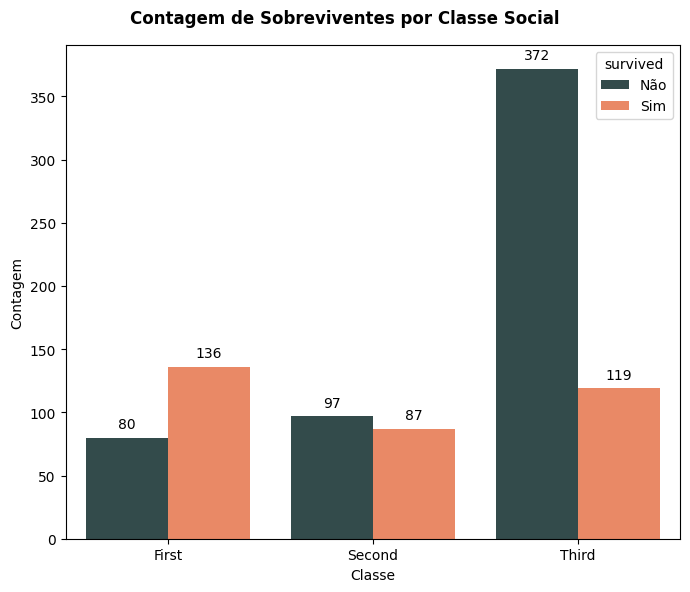

In [182]:
plt.figure(figsize=(7,6))

plt.suptitle('Contagem de Sobreviventes por Classe Social', fontweight='bold')

colors = {"Não": 'darkslategray', "Sim": 'coral'}

order = ['First', 'Second', 'Third']

ax = sns.countplot(x='class', hue='survived', data=titanic_modif, palette=colors, order=order)

plt.xlabel('Classe')
plt.ylabel('Contagem')

for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5, f'{int(p.get_height())}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

- A primeira classe teve 136 sobreviventes e 80 não sobreviventes. A proporção de sobreviventes é maior na primeira classe em comparação com as outras classes.
Isso sugere que a classe social pode ter influenciado as chances de sobrevivência no Titanic.

- Já a segunda classe teve 87 sobreviventes e 97 não sobreviventes. Mesmo que a proporção de sobreviventes seja menor que na primeira classe, ainda assim a segunda classe teve uma alta taxa de sobrevivência.

- E por último, a terceira classe teve 119 sobreviventes e 372 não sobreviventes, a proporção de sobreviventes é significativamente menor na terceira classe.
Isso pode indicar que a classe social desempenhou um papel importante na tragédia do Titanic.

---

### 3.3. Relação entre Tarifa e Sobrevivência (fare vs. survived)

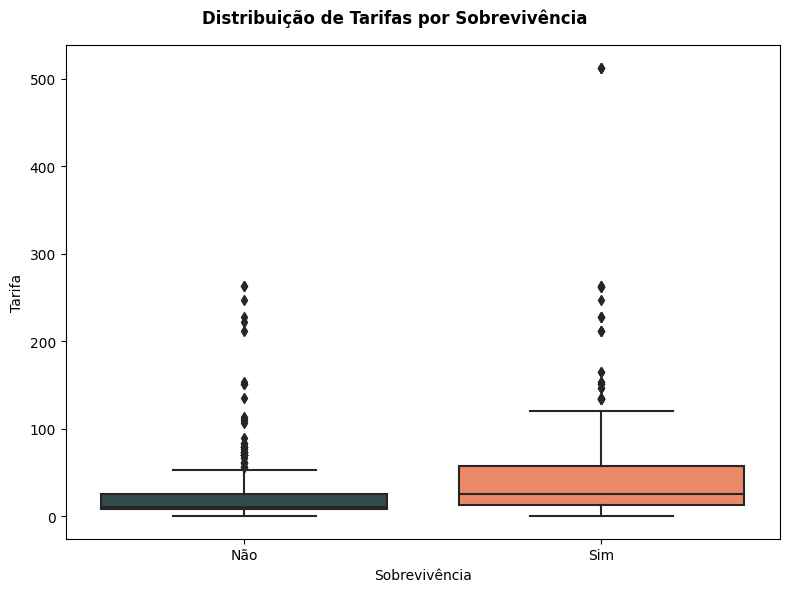

In [165]:
plt.figure(figsize=(8,6))
plt.suptitle('Distribuição de Tarifas por Sobrevivência', fontweight='bold')

colors = {'Não': 'darkslategray', 'Sim': 'coral'}
sns.boxplot(x='survived', y='fare', data=titanic_modif, palette=colors)
plt.xlabel('Sobrevivência')
plt.ylabel('Tarifa')
plt.tight_layout()
plt.show()

- Existem alguns valores atípicos (outliers) em ambas as categorias.

- Passageiros que pagaram tarifas mais altas parecem ter uma taxa de sobrevivência maior.

- A tarifa pode ter sido um fator importante na chance de sobrevivência no Titanic.

---

### 3.4. Relação entre Idade e Sobrevivência (age vs. survived)

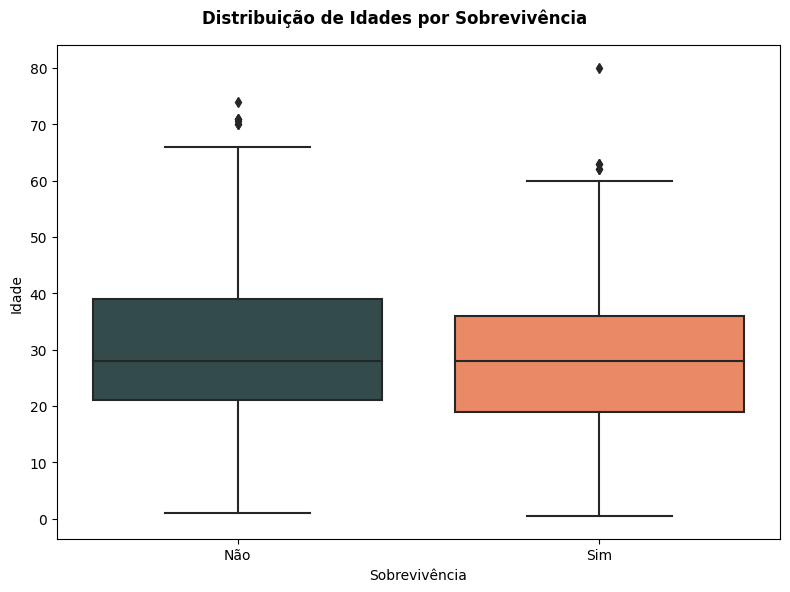

In [166]:
plt.figure(figsize=(8,6))
plt.suptitle('Distribuição de Idades por Sobrevivência', fontweight='bold')
colors = {"Não": 'darkslategray', "Sim": 'coral'}
sns.boxplot(x='survived', y='age', data=titanic_modif, palette=colors)
plt.xlabel('Sobrevivência')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()


- A faixa etária varia de bebês (menos de 1 ano) até idosos (80 anos ou mais).

- Os passageiros que não sobreviveram (“Não”) têm uma maior variabilidade de idades.

- A idade pode ter sido um fator importante na chance de sobrevivência no Titanic.

- Os sobreviventes parecem incluir uma faixa etária mais ampla, possivelmente indicando que crianças e idosos tiveram maior probabilidade de sobreviver.

---

### 3.5. Relação entre Porto de Embarque e Sobrevivência (embarked vs. survived)

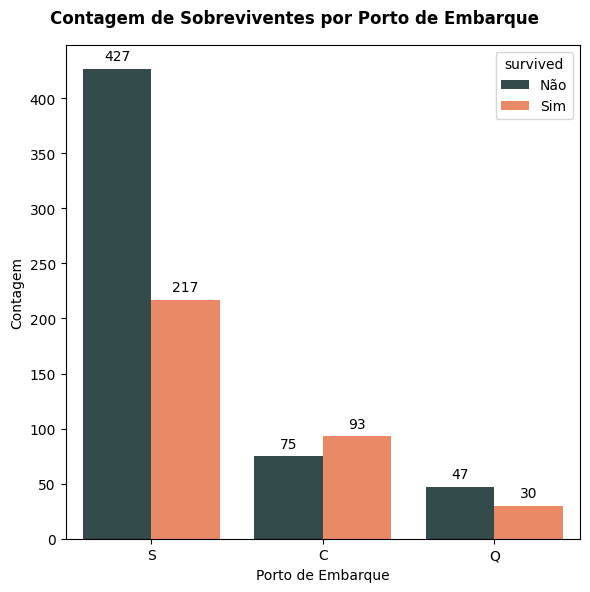

In [181]:
plt.figure(figsize=(6,6))

plt.suptitle('Contagem de Sobreviventes por Porto de Embarque', fontweight='bold')

colors = {"Não": 'darkslategray', "Sim": 'coral'}

ax = sns.countplot(x='embarked', hue='survived', data=titanic_modif, palette=colors)

plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')

# Adição de rótulos nas barras
for p in ax.patches:
    # Obtendo as coordenadas da barra
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    # Adicionando o rótulo com ajuste de alinhamento
    ax.text(x, height + 5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Porto de Embarque e Sobrevivência:

- O gráfico mostra a contagem de sobreviventes com base no porto de embarque.

- O porto rotulado como ‘S’ tem o maior número de sobreviventes, seguido por ‘C’ e depois ‘Q’.

- Isso sugere que o porto de embarque pode ter influenciado as chances de sobrevivência no Titanic.

Possíveis Explicações:

- Diferenças nas características dos passageiros em cada porto podem ter afetado a priorização no resgate.

- O porto de embarque pode estar relacionado à classe social ou outras variáveis não representadas no gráfico.

---

### 3.6. Relação entre Quantidade de Familiates e Sobrevivência (sibsp e parch vs. survived)

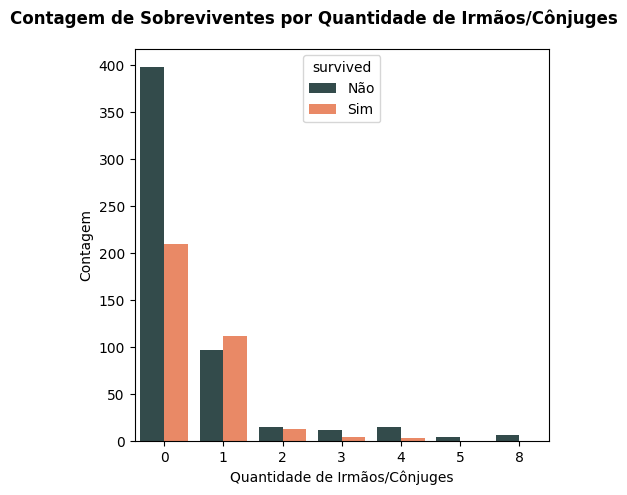

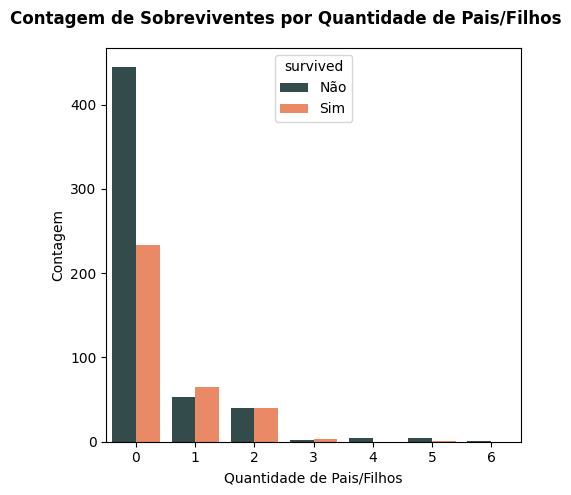

In [173]:
plt.figure(figsize=(5,5))
plt.suptitle('Contagem de Sobreviventes por Quantidade de Irmãos/Cônjuges', fontweight='bold')
colors = {"Não": 'darkslategray', "Sim": 'coral'}
sns.countplot(x='sibsp', hue='survived', data=titanic_modif, palette=colors)
plt.xlabel('Quantidade de Irmãos/Cônjuges')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
plt.suptitle('Contagem de Sobreviventes por Quantidade de Pais/Filhos', fontweight='bold')
colors = {"Não": 'darkslategray', "Sim": 'coral'}
sns.countplot(x='parch', hue='survived', data=titanic_modif, palette=colors)
plt.xlabel('Quantidade de Pais/Filhos')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


- Os passageiros com 1 ou 2 irmãos/cônjuges parecem ter maior probabilidade de sobrevivência.
Passageiros com 0 ou mais de 5 irmãos/cônjuges tiveram menor probabilidade de sobreviver.

- Os passageiros com 1 ou 2 pais/filhos parecem ter maior probabilidade de sobrevivência.
Passageiros com 0 ou mais de 5 pais/filhos tiveram menor probabilidade de sobreviver.

---

### 3.7. Correlação entre variáveis

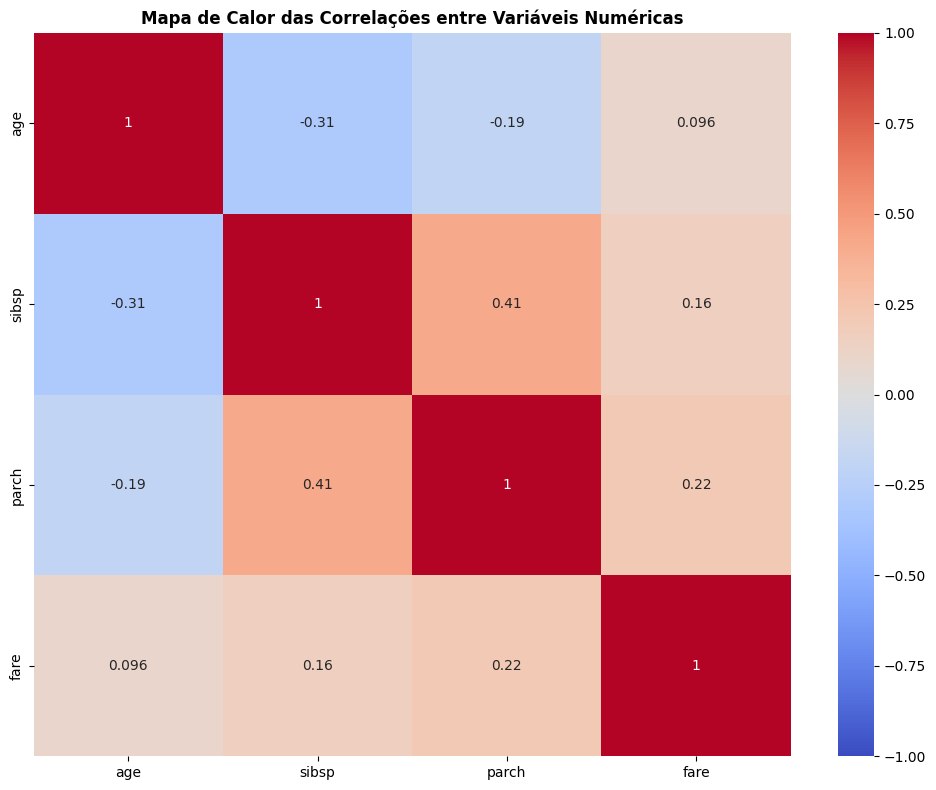

In [184]:
numeric_vars = ['age', 'sibsp', 'parch', 'fare']
corr_matrix = titanic_modif[numeric_vars].corr()

plt.figure(figsize=(10,8))

plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas', fontweight='bold')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()
plt.show()

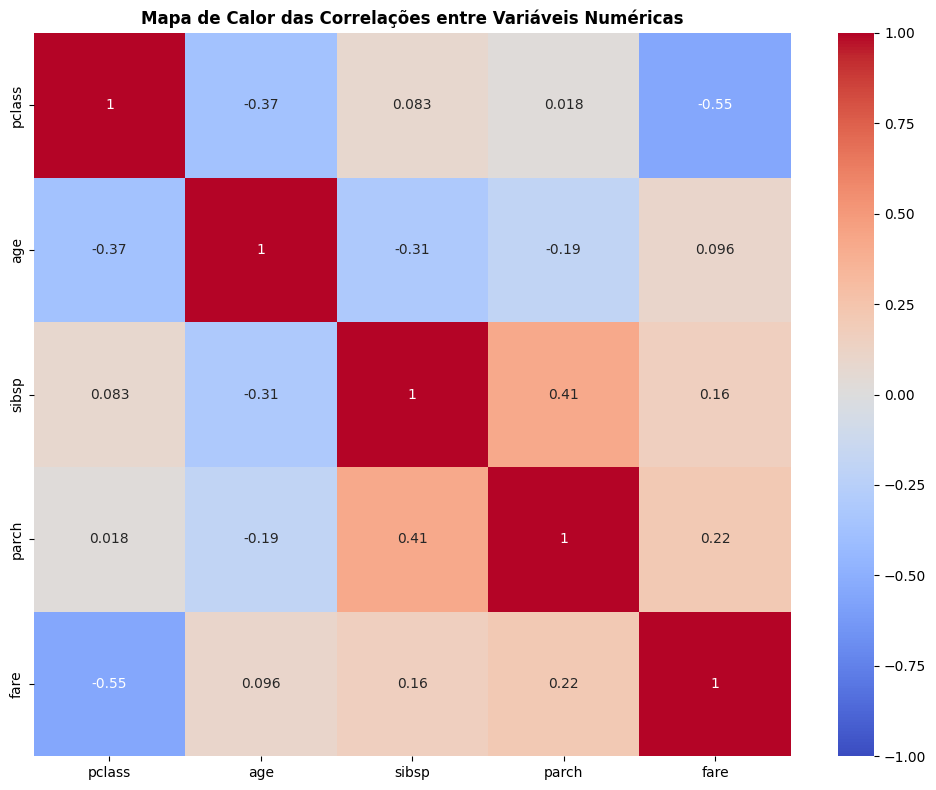

In [185]:
# Conversão da coluna 'pclass' para numérica
titanic_modif['pclass'] = titanic_modif['pclass'].astype(float)

# Adição da variável 'pclass' na lista de variáveis numéricas
numeric_vars = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# Cálculo da matriz de correlação
corr_matrix = titanic_modif[numeric_vars].corr()

plt.figure(figsize=(10,8))

plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas', fontweight='bold')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()
plt.show()

Coeficiente de Correlação de Pearson:
    
- O coeficiente de correlação de Pearson (representado por “r”) mede a relação linear entre duas variáveis. Um valor próximo de 1 indica uma forte correlação positiva (quando uma variável aumenta, a outra também aumenta) e um valor próximo de -1 indica uma forte correlação negativa (quando uma variável aumenta, a outra diminui).

- Um valor próximo de 0 sugere pouca ou nenhuma correlação linear.

Relações Importantes:

- A variável “pclass” (classe social) tem uma correlação negativa com “fare” (tarifa). Isso significa que passageiros de classe social 1 (1° classe)  tenderam a pagar tarifas mais altas e os de classe 3 tenderam a pagar as tarifas mais baixas.

- “age” (idade) tem uma correlação negativa com “pclass”, indicando que passageiros mais jovens tendem a estar em classes sociais mais altas.

- “parch” (quantidade de pais/filhos) e “sibsp” (quantidade de irmãos/cônjuges) têm uma correlação positiva, sugerindo que famílias maiores viajavam juntas.

Interpretação:

- Passageiros de classes sociais mais altas pagaram tarifas mais altas e eram mais jovens.

- Famílias maiores (com mais pais/filhos e irmãos/cônjuges) viajavam juntas.

### 3.8. Resumo


- Classe Social e Sobrevivência:
    
    - A primeira classe teve a maior proporção de sobreviventes, indicando que a classe social influenciou as chances de sobrevivência.
    
    - A segunda classe também teve uma taxa de sobrevivência relativamente alta.
    
    - A terceira classe teve a menor proporção de sobreviventes, possivelmente devido a condições menos favoráveis.

- Idade e Sobrevivência:

    - A idade parece ter sido um fator importante na chance de sobrevivência.
    
    - Crianças e idosos tiveram maior probabilidade de sobreviver.

- Tarifa e Sobrevivência:

    - Passageiros que pagaram tarifas mais altas tiveram maior taxa de sobrevivência.

    - A tarifa pode ter sido um indicador de prioridade no resgate.

- Família e Sobrevivência:

    - Passageiros com 1 ou 2 pais/filhos tiveram maior probabilidade de sobrevivência.

    - Aqueles com 0 ou mais de 5 pais/filhos tiveram menor probabilidade de sobreviver.
    
Essas conclusões nos ajudam a entender melhor os fatores que afetaram a sobrevivência dos passageiros no Titanic. 